Kaggle's Data Challenge - Supervised ML

Let’s take what you’ve learned over the past week and put it into practice. The dataset we will be using contains two CSV files ‘features’ and ‘target’. You will receive the link on the day of the challenge.

Each row in the ‘features’ belongs to a ‘measurement’ and each column represents a ‘feature’. For each row in the ‘features’ you have a corresponding class label in ‘target’. You can consider the row-numbers as keys.

You will have to use data labelled as ‘train’ for implementing the models. You have to submit the results that you obtain from the predictions of your Machine Learning models from the data labelled as ‘test’.

Complete the following:

    Explore your data. Can you identify anything interest that is worth noting from the data?
    Define a set of possible classifiers and show which one performs best. Keep in mind the problem of overfitting.
    Using feature selection try to reduce the number of features. In the dataset you have over 120 features. Find the good ones for your classifier.

Keep in mind that there is no best solution to the challenge. Show how you approach a problem, and the skills/methods you use in that approach.

Evaluation Process:

The relevant metric in scikit-learn to increase is f1_macro. After you finish your best model, please save your predictions to CSV file with the column names ‘Id’ and ‘Predicted’. No index column!

Submit your CSV file in ‘Submit Predictions’ section.

You can check your score in ‘My Submissions’ section and choose the one to make it Final Score by checking the ‘Use for Final Score’ checkbox.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.__version__

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
train_path= '/content/drive/My Drive/Constructor_Academy/Gitlab/justin-villard/04_MachineLearning/day6/features_train.csv'
data = pd.read_csv(train_path)
data.head(10)

,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,...,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,...,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,...,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,...,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,...,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165
5,5,0.006955,0.345700,0.476871,1.451089,0.034416,1.161069,5.553146,0.682747,-2.361643,...,0.331590,0.562080,0.149385,4.142986,-0.331803,-6.752070,4.522790,1.327245,0.686556,0.370519
6,6,0.033421,1.547203,3.832544,5.864969,0.017199,0.433405,-31.031366,11.678044,-20.990645,...,1.118229,0.139708,0.108585,0.747711,0.701920,14.389204,0.509319,0.232577,0.303178,0.673770
7,7,0.010046,0.229306,4.009751,0.727105,0.000433,0.008759,26.635944,5.087996,5.952485,...,0.204028,0.019983,0.097477,2.964062,0.449843,8.173558,20.835307,0.466732,0.459114,1.212549
8,8,0.127732,2.994012,19.070958,0.510953,0.335824,0.402872,-4.131040,2.557559,-18.882046,...,1.566848,0.864803,0.991751,0.543926,-1.849439,-6.110810,2.840204,0.528802,0.943703,4.863292
9,9,0.157382,1.067279,3.456239,0.056444,0.002137,0.010691,16.523108,3.937696,0.801355,...,3.337579,0.250173,0.643348,2.485729,0.058090,3.981239,3.689334,4.761166,0.101749,2.178764


In [55]:
target_path= '/content/drive/My Drive/Constructor_Academy/Gitlab/justin-villard/04_MachineLearning/day6/target_train.csv'
target = pd.read_csv(target_path)
target.head(10)

,Id,Expected
0,0,0
1,1,0
2,2,2
3,3,1
4,4,2
5,5,2
6,6,0
7,7,1
8,8,1
9,9,2


In [56]:
target.nunique()

Id          10000
Expected        3
dtype: int64

In [57]:
y = target.drop(columns=['Id'])
y.head(10)

,Expected
0,0
1,0
2,2
3,1
4,2
5,2
6,0
7,1
8,1
9,2


Basic EDA

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 121 entries, Id to 119
dtypes: float64(120), int64(1)
memory usage: 9.2 MB


In [59]:
data.nunique()

Id     10000
0      10000
1      10000
2      10000
3      10000
       ...  
115    10000
116    10000
117    10000
118    10000
119    10000
Length: 121, dtype: int64

In [60]:
data.columns[data.isna().any()].tolist()

[]

In [61]:
X = data.drop(columns=['Id'])
#X['Expected'] = y['Expected']
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000206e+00,1.653294,1.323895e+01,1.631063,1.004520e+00,1.011949e+00,0.520059,1.657632,-0.002513,1.671704,...,1.648705,0.497571,0.493227,1.635187,-0.000071,-0.026737,0.013010,1.620603,0.503886,1.667950
std,1.423822e+00,2.278088,1.870323e+01,2.040002,1.409997e+00,1.444751e+00,31.791384,2.116264,10.060025,2.251833,...,2.188790,0.285955,0.290153,1.975617,0.997596,10.082855,9.968787,2.117979,0.285662,2.203032
min,1.282517e-08,0.024358,7.274511e-07,0.020518,3.379589e-11,1.348884e-07,-129.141171,0.019514,-37.427526,0.028163,...,0.022037,0.000128,0.000217,0.016691,-3.885360,-34.580159,-40.925480,0.016396,0.000139,0.029379
25%,1.040056e-01,0.509503,1.318718e+00,0.512428,1.042731e-01,1.005381e-01,-21.037225,0.507242,-6.698098,0.512798,...,0.510389,0.252094,0.241741,0.511563,-0.677989,-6.804569,-6.904905,0.504073,0.260493,0.513686
50%,4.602140e-01,0.995946,6.109321e+00,0.994325,4.558152e-01,4.490724e-01,0.351341,0.998968,0.081728,0.996833,...,0.990977,0.496045,0.488491,0.999822,-0.006377,-0.109698,0.155250,1.002604,0.503294,1.003636
75%,1.295762e+00,1.943914,1.758705e+01,1.933788,1.339252e+00,1.336866e+00,21.714889,1.982386,6.818884,1.984666,...,1.944777,0.744041,0.747421,1.988738,0.669345,6.765366,6.820834,1.932612,0.748390,1.941041
max,1.601254e+01,72.033830,2.681004e+02,33.933547,1.684319e+01,1.812245e+01,118.399310,37.265489,38.392229,45.191073,...,36.698799,0.999973,0.999895,26.936000,3.737129,36.371289,34.679957,44.943499,0.999985,45.467996


In [62]:
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '110', '111', '112', '113', '114', '115', '116', '117', '118', '119'],
      dtype='object', length=120)

In [63]:
sns.pairplot(X)

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7dbd54cd2290> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7dbd54cd1510> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
X.hist(figsize=(15, 10))

In [64]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().set_output(transform="pandas")
X_scaled = ss.fit_transform(X)

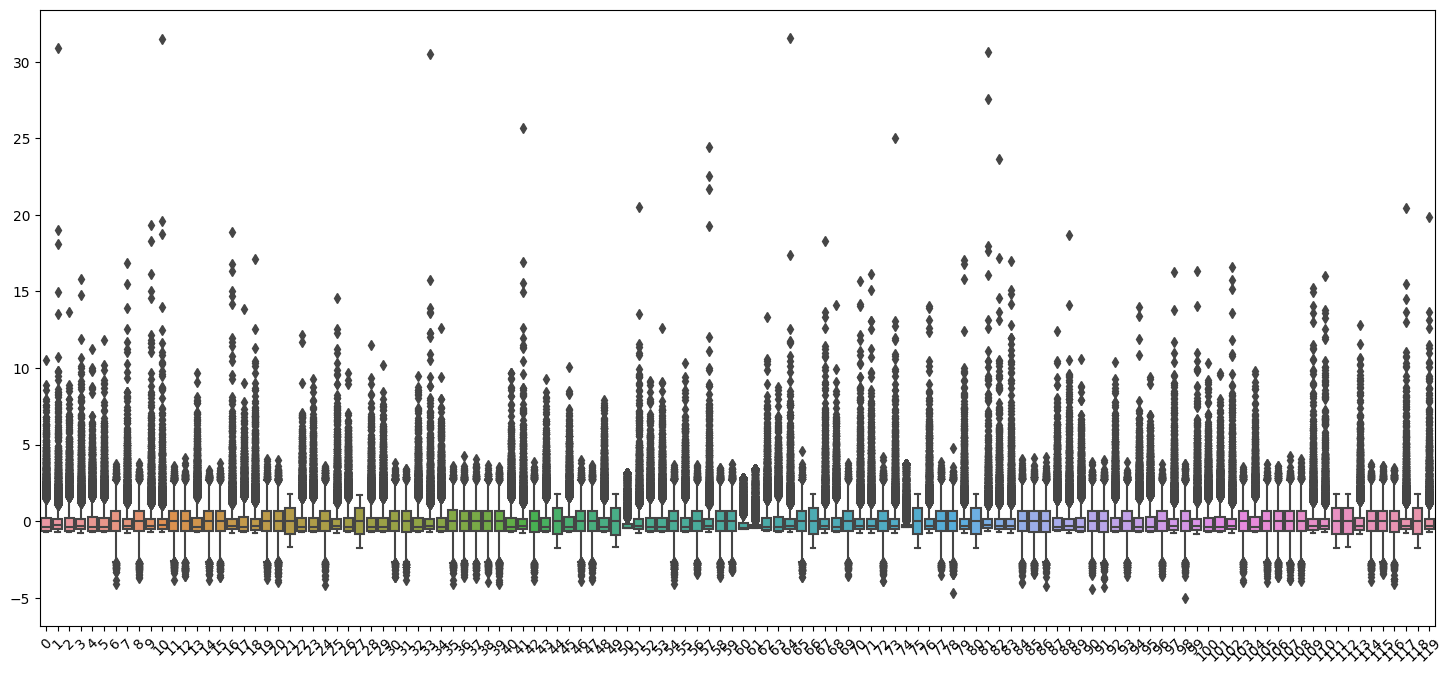

In [65]:
fig, ax = plt.subplots(figsize=(18,8))
sns.boxplot(ax=ax, data=X_scaled, orient='v')
plt.xticks(rotation=45);

In [66]:
X.select_dtypes(include=["object"]).apply(lambda col: len(col.unique()))

Series([], dtype: float64)

## Build a Baseline Model with Raw Features

### PyCaret

In [32]:
!pip install --pre pycaret
!pip install "schemdraw<0.16" #<-- To handle dependency issues

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.9 MB/s et

In [33]:
# Run this for more advanced tuning strategies
# check documentation: https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.ClassificationExperiment.tune_model
!pip install pycaret[tuners]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


In [34]:
# for some model interpretation functions
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00


In [35]:
from pycaret.utils import version
version()

'3.2.0'

In [68]:
from pycaret.classification import *

clf = setup(data=pd.concat([X, y], axis=1),
            target='Expected',
            session_id=13,
            experiment_name='kaggle_constructor',
            n_jobs=-1)

,Description,Value
0,Session id,13
1,Target,Expected
2,Target type,Multiclass
3,Original data shape,"(10000, 121)"
4,Transformed data shape,"(10000, 121)"
5,Transformed train set shape,"(7000, 121)"
6,Transformed test set shape,"(3000, 121)"
7,Numeric features,120
8,Preprocess,True
9,Imputation type,simple


In [93]:
best_model = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5506,0.7305,0.5506,0.5505,0.5502,0.3259,0.3261,19.7160
xgboost,Extreme Gradient Boosting,0.5287,0.7149,0.5287,0.5285,0.5284,0.2931,0.2932,11.8280
gbc,Gradient Boosting Classifier,0.5147,0.7049,0.5147,0.5145,0.5135,0.2723,0.2729,70.8760
rf,Random Forest Classifier,0.4801,0.6708,0.4801,0.4799,0.4794,0.2203,0.2206,6.1260
ada,Ada Boost Classifier,0.4486,0.6360,0.4486,0.4472,0.4463,0.1732,0.1738,4.6620
lda,Linear Discriminant Analysis,0.4390,0.6204,0.4390,0.4384,0.4384,0.1586,0.1587,0.2560
lr,Logistic Regression,0.4389,0.6204,0.4389,0.4381,0.4382,0.1584,0.1585,5.5360
ridge,Ridge Classifier,0.4386,0.0000,0.4386,0.4375,0.4373,0.1581,0.1583,0.0860
qda,Quadratic Discriminant Analysis,0.4369,0.6183,0.4369,0.4374,0.4370,0.1552,0.1552,0.1640
et,Extra Trees Classifier,0.4223,0.6107,0.4223,0.4219,0.4217,0.1335,0.1336,1.5020


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [70]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [69]:
lightgbm = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5693,0.7495,0.5693,0.5690,0.5689,0.3540,0.3541
1,0.5771,0.7585,0.5771,0.5771,0.5769,0.3657,0.3659
2,0.5621,0.7460,0.5621,0.5618,0.5616,0.3433,0.3436
3,0.5586,0.7573,0.5586,0.5580,0.5582,0.3379,0.3380
4,0.5979,0.7709,0.5979,0.5974,0.5971,0.3969,0.3972
Mean,0.5730,0.7564,0.5730,0.5727,0.5725,0.3596,0.3598
Std,0.0140,0.0086,0.0140,0.0140,0.0139,0.0210,0.0210


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
tuned_lightgbm = tune_model(lightgbm,
                      n_iter=10,
                      optimize='f1',
                      fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5514,0.7408,0.5514,0.5511,0.5512,0.3272,0.3272
1,0.5636,0.7473,0.5636,0.5630,0.5630,0.3454,0.3456
2,0.5421,0.7353,0.5421,0.5419,0.5416,0.3134,0.3136
3,0.5743,0.7551,0.5743,0.5743,0.5743,0.3614,0.3615
4,0.5829,0.7692,0.5829,0.5834,0.5826,0.3744,0.3747
Mean,0.5629,0.7495,0.5629,0.5628,0.5625,0.3443,0.3445
Std,0.0148,0.0118,0.0148,0.0150,0.0149,0.0221,0.0221


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [75]:
plot_model(tuned_lightgbm, plot='feature')

ImportError: ignored

In [100]:
final_lightgbm = finalize_model(tuned_lightgbm)
final_lightgbm

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27', '28', '29', ...],
                                    transformer=KNNImputer(add_indicator=False,
                                                           copy=True,
                                                           keep_empty_features=False,
                                                           metric='nan_euclide...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=13,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [102]:
save_model(final_lightgbm, model_name='final_lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=KNNImputer(add_indicator=False,
                                                            copy=True,
                                                            keep_empty_features=False,
                                                            metric='nan_euclide...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_ty

In [77]:
test_path = '/content/drive/My Drive/Constructor_Academy/Gitlab/justin-villard/04_MachineLearning/day6/features_test.csv'
test = pd.read_csv(test_path)
test.head(10)

,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,0.242392,0.524801,9.531945,0.551043,0.853324,2.084798,-23.881055,1.752809,4.019658,...,0.996646,0.464636,0.927718,2.136614,-0.625167,11.164489,12.651970,3.191951,0.770754,11.564876
1,1,0.197594,1.029150,13.064256,2.697584,0.032053,0.555707,-47.774112,0.211458,-5.489373,...,16.166253,0.074028,0.114691,0.700676,0.909923,-12.253487,-0.839493,3.405661,0.772885,2.602072
2,2,0.676448,0.250171,10.370677,1.255717,0.028614,1.916394,65.747722,1.791534,-10.868221,...,1.382589,0.527797,0.818678,0.780533,1.833105,9.943211,-11.567759,0.387331,0.345355,0.274009
3,3,1.561018,0.617100,0.379516,1.515827,0.005581,0.002844,-11.036037,0.154748,17.727657,...,3.028235,0.664532,0.124984,0.438145,0.562478,1.999034,-3.481156,0.374161,0.657491,0.944878
4,4,0.403669,6.981975,0.535448,0.654590,0.670791,2.377098,8.185199,0.703429,5.420341,...,2.218101,0.228779,0.156150,1.444829,0.905621,4.061059,3.467491,0.339719,0.411329,0.382129
5,5,0.005151,0.704430,0.899308,3.289049,4.509656,2.980250,-10.703420,0.194435,4.262766,...,0.581354,0.450882,0.636700,0.264653,0.305829,-21.622500,17.331488,2.529836,0.570538,3.924250
6,6,0.230777,2.411689,2.901051,1.852147,0.267655,1.141194,8.551531,13.149636,-1.586111,...,0.465738,0.548618,0.598314,1.116268,2.067375,-11.191706,-10.067432,2.675459,0.555164,0.488009
7,7,0.014171,0.628384,4.855317,0.999221,0.225157,0.261019,19.651426,0.592308,2.808565,...,1.437383,0.353216,0.423655,0.903827,-1.436661,-10.902757,-14.063963,0.221067,0.341017,0.416032
8,8,0.470726,1.233227,11.133887,1.966118,0.015497,0.000358,30.883752,0.250172,-4.293933,...,0.702977,0.988350,0.528454,0.506184,1.458402,-8.070660,7.793581,0.340951,0.734561,0.189567
9,9,0.486908,1.100882,6.425974,3.623816,0.000715,0.605506,-29.462837,1.585189,4.895793,...,2.717857,0.343250,0.048222,0.367129,-2.303404,0.166849,5.741723,0.180680,0.479644,2.539035


In [78]:
X_test = test.drop(columns=['Id'])
X_test

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.242392,0.524801,9.531945,0.551043,0.853324,2.084798,-23.881055,1.752809,4.019658,0.611603,...,0.996646,0.464636,0.927718,2.136614,-0.625167,11.164489,12.651970,3.191951,0.770754,11.564876
1,0.197594,1.029150,13.064256,2.697584,0.032053,0.555707,-47.774112,0.211458,-5.489373,0.263423,...,16.166253,0.074028,0.114691,0.700676,0.909923,-12.253487,-0.839493,3.405661,0.772885,2.602072
2,0.676448,0.250171,10.370677,1.255717,0.028614,1.916394,65.747722,1.791534,-10.868221,0.251500,...,1.382589,0.527797,0.818678,0.780533,1.833105,9.943211,-11.567759,0.387331,0.345355,0.274009
3,1.561018,0.617100,0.379516,1.515827,0.005581,0.002844,-11.036037,0.154748,17.727657,0.398472,...,3.028235,0.664532,0.124984,0.438145,0.562478,1.999034,-3.481156,0.374161,0.657491,0.944878
4,0.403669,6.981975,0.535448,0.654590,0.670791,2.377098,8.185199,0.703429,5.420341,1.516365,...,2.218101,0.228779,0.156150,1.444829,0.905621,4.061059,3.467491,0.339719,0.411329,0.382129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.741515,0.134820,7.248496,1.042125,0.000725,0.027404,-26.098770,0.522976,11.508938,0.520386,...,1.032681,0.117975,0.527086,0.910612,-0.013523,-17.638597,8.928354,2.404990,0.443886,1.707916
19996,1.358898,0.221614,8.012158,3.175524,0.552219,0.223238,-15.627277,2.255131,6.387290,0.867334,...,0.881214,0.913261,0.591320,0.516800,0.770858,-5.014199,-9.313518,1.043028,0.230945,0.462449
19997,0.000939,1.227475,48.685046,1.419278,2.873372,0.784268,-32.856775,0.661216,15.567761,0.603542,...,0.652379,0.070280,0.419313,1.644102,-0.628569,-0.407432,0.777995,0.803730,0.557201,2.501288
19998,0.127647,4.263982,22.509525,0.383584,0.205385,0.630785,29.201405,3.111156,-8.013544,0.850345,...,1.940163,0.720134,0.068648,0.258238,0.769108,-4.154734,-11.241676,5.395268,0.765356,0.650460


In [79]:
prediction_df = predict_model(final_lightgbm, data=X_test)
prediction_df.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,prediction_label,prediction_score
0,0.242392,0.524801,9.531944,0.551043,0.853324,2.084798,-23.881054,1.752809,4.019658,0.611603,...,0.927718,2.136614,-0.625167,11.164490,12.651970,3.191951,0.770754,11.564876,2,0.5762
1,0.197594,1.029150,13.064257,2.697584,0.032053,0.555707,-47.774113,0.211458,-5.489373,0.263423,...,0.114691,0.700676,0.909923,-12.253487,-0.839493,3.405661,0.772885,2.602072,0,0.6550
2,0.676448,0.250171,10.370677,1.255717,0.028614,1.916394,65.747719,1.791534,-10.868221,0.251500,...,0.818678,0.780533,1.833105,9.943212,-11.567760,0.387331,0.345355,0.274009,1,0.4756
3,1.561018,0.617100,0.379516,1.515828,0.005581,0.002844,-11.036037,0.154748,17.727657,0.398472,...,0.124984,0.438145,0.562478,1.999034,-3.481156,0.374161,0.657491,0.944878,1,0.4010
4,0.403669,6.981975,0.535448,0.654590,0.670791,2.377098,8.185200,0.703429,5.420341,1.516366,...,0.156150,1.444829,0.905621,4.061059,3.467491,0.339719,0.411329,0.382129,1,0.5210


In [81]:
y_test = pd.DataFrame({'Id': np.arange(0,len(prediction_df['prediction_label'])),
                       'Predicted': prediction_df['prediction_label']
                      })
y_test

,Id,Predicted
0,0,2
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
19995,19995,0
19996,19996,0
19997,19997,2
19998,19998,2


In [84]:
y_test.to_csv('/content/drive/MyDrive/Constructor_Academy/Gitlab/justin-villard/04_MachineLearning/day6/final_lightgbm.csv', index=False)

### Select data in the interquartile range, impute NaN values


In [86]:
def filter_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

In [95]:
filtered_X = X.apply(filter_iqr) #.dropna()
filtered_X

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,0.414074,...,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,NaN,-9.188298,1.203232,...,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,0.176904,...,0.897811,0.610529,0.158270,NaN,0.358590,-8.164399,0.596139,0.522287,0.832107,NaN
3,0.060388,1.408700,NaN,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,3.147786,...,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,0.841208,...,NaN,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,NaN,0.782079,0.279165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.039133,1.932955,30.527258,1.895394,1.460542,0.192537,32.700597,0.492404,-12.989238,2.891657,...,0.074315,0.813626,0.591380,0.450031,2.068493,1.602963,0.167108,0.134495,0.892673,3.217339
9996,0.000060,0.161456,0.645531,1.651073,NaN,0.051387,-19.142738,0.733723,-15.606911,0.315542,...,0.192683,0.792759,0.091530,1.726438,1.238569,-2.790124,-0.720931,0.639697,0.272982,1.503869
9997,NaN,0.496327,2.274211,0.872857,0.306053,0.546092,26.789277,2.595019,-7.808649,1.892135,...,1.143706,0.060087,0.700386,0.611112,-0.732795,-6.374433,0.548602,NaN,0.422413,1.251670
9998,0.009933,0.571243,1.990313,0.647652,0.559522,0.363403,6.723800,1.081141,11.456673,0.344549,...,0.435313,0.440300,0.386854,0.859887,-1.179432,8.891759,12.228795,1.913393,0.153819,0.385354


In [97]:
clf = setup(data=pd.concat([filtered_X, y], axis=1),
            target='Expected',
            numeric_imputation='knn',
            session_id=1,
            experiment_name='kaggle_constructor_iqr',
            n_jobs=-1)

,Description,Value
0,Session id,1
1,Target,Expected
2,Target type,Multiclass
3,Original data shape,"(10000, 121)"
4,Transformed data shape,"(10000, 121)"
5,Transformed train set shape,"(7000, 121)"
6,Transformed test set shape,"(3000, 121)"
7,Numeric features,120
8,Rows with missing values,99.7%
9,Preprocess,True


In [98]:
best_model_filtered = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5360,0.7180,0.5360,0.5360,0.5357,0.3041,0.3043,34.8220
xgboost,Extreme Gradient Boosting,0.5069,0.6992,0.5069,0.5069,0.5067,0.2603,0.2604,28.3240
gbc,Gradient Boosting Classifier,0.5026,0.6948,0.5026,0.5033,0.5018,0.2540,0.2546,89.9600
rf,Random Forest Classifier,0.4780,0.6628,0.4780,0.4779,0.4777,0.2171,0.2172,23.3180
ridge,Ridge Classifier,0.4430,0.0000,0.4430,0.4415,0.4415,0.1647,0.1650,18.0520
ada,Ada Boost Classifier,0.4431,0.6332,0.4431,0.4413,0.4409,0.1651,0.1656,23.0120
lr,Logistic Regression,0.4409,0.6201,0.4409,0.4400,0.4402,0.1614,0.1615,21.9080
lda,Linear Discriminant Analysis,0.4407,0.6200,0.4407,0.4399,0.4401,0.1612,0.1613,16.0060
et,Extra Trees Classifier,0.4401,0.6200,0.4401,0.4406,0.4400,0.1601,0.1603,19.5880
qda,Quadratic Discriminant Analysis,0.4356,0.6173,0.4356,0.4360,0.4356,0.1533,0.1533,16.8900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [99]:
best_model_filtered

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [101]:
filtered_lightgbm = finalize_model(best_model_filtered)
filtered_lightgbm

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27', '28', '29', ...],
                                    transformer=KNNImputer(add_indicator=False,
                                                           copy=True,
                                                           keep_empty_features=False,
                                                           metric='nan_euclide...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=1,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [103]:
save_model(filtered_lightgbm, model_name='filtered_lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=KNNImputer(add_indicator=False,
                                                            copy=True,
                                                            keep_empty_features=False,
                                                            metric='nan_euclide...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_ty

In [104]:
prediction_df = predict_model(filtered_lightgbm, data=X_test)
prediction_df.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,prediction_label,prediction_score
0,0.242392,0.524801,9.531944,0.551043,0.853324,2.084798,-23.881054,1.752809,4.019658,0.611603,...,0.927718,2.136614,-0.625167,11.164490,12.651970,3.191951,0.770754,11.564876,2,0.6765
1,0.197594,1.029150,13.064257,2.697584,0.032053,0.555707,-47.774113,0.211458,-5.489373,0.263423,...,0.114691,0.700676,0.909923,-12.253487,-0.839493,3.405661,0.772885,2.602072,1,0.3568
2,0.676448,0.250171,10.370677,1.255717,0.028614,1.916394,65.747719,1.791534,-10.868221,0.251500,...,0.818678,0.780533,1.833105,9.943212,-11.567760,0.387331,0.345355,0.274009,1,0.5508
3,1.561018,0.617100,0.379516,1.515828,0.005581,0.002844,-11.036037,0.154748,17.727657,0.398472,...,0.124984,0.438145,0.562478,1.999034,-3.481156,0.374161,0.657491,0.944878,2,0.4642
4,0.403669,6.981975,0.535448,0.654590,0.670791,2.377098,8.185200,0.703429,5.420341,1.516366,...,0.156150,1.444829,0.905621,4.061059,3.467491,0.339719,0.411329,0.382129,2,0.3998


Last attempt with the chosen model

In [111]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

# Create a pipeline with a StandardScaler and a LightGBM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # StandardScaler to scale numeric data
    ('lgbm', LGBMClassifier())      # LightGBM Classifier
])

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1-macro')

# Fit the pipeline on the training data (optional if you want to use the cross_val_score results)
pipeline.fit(X, y)

# Evaluate the model using the cross-validated scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores)}')

# Predict on the test data
y_pred = pipeline.predict(X_test)

ValueError: ignored